In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def get_metrics(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**(1/2)
    r2training = model.score(x_train, y_train)
    r2test = model.score(x_test, y_test)
    r2 = r2_score(y_test, y_pred)
    print(model)
    print('R2 of Training:', r2training)
    print('R2 of Test:', r2test)
    print('R2 Score:', r2)
    print('MSE:', mse)
    print('RMSE:', rmse)
    
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
knn = KNeighborsRegressor()

In [2]:
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Thinkful/Data/Important Data/WeaponDataV3.csv')

In [3]:
oss_cols = [c for c in df.columns if 'OSS' in c]
df['Total OSS'] = df[oss_cols].sum(axis=1)
print(df.shape)
df['Total OSS'].describe()

(24979, 138)


count     24979.000000
mean         83.966011
std         895.605375
min           0.000000
25%           2.000000
50%          16.000000
75%          64.000000
max      122550.000000
Name: Total OSS, dtype: float64

In [4]:
exp_cols = [c for c in df.columns if 'Expulsion' in c]
df['Total Expulsion'] = df[exp_cols].sum(axis=1)
print(df.shape)
df['Total Expulsion'].describe()

(24979, 139)


count    24979.000000
mean         1.139197
std          6.215564
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        632.000000
Name: Total Expulsion, dtype: float64

In [5]:
df['Weapon Expulsion Percent'] = df['Weapon Expulsion'] / df['Total Expulsion']
df.loc[~np.isfinite(df['Weapon Expulsion Percent']), 'Weapon OSS Percent'] = 0

df['Any Possession of Knife'] = ((df['Possession of a Knife'] > 1).astype(int))
df['More than 100 Law Enforcement Incidents'] = ((df['No. of Incidents Involving Local Law Enforcement'] > 100).astype(int))

df['Enrollment More Than 1000'] = ((df['Enrollment'] > 1000).astype(int))

df['Arrests More Than 5'] = ((df['Total Arrests'] > 5).astype(int))

df['Weapon EXP Percent over 30'] = ((df['Weapon Expulsion Percent'] > .3).astype(int))

df['Severe Weapon Punishments'] = df['Weapon Expulsion'] + df['Weapon OSS']
df['Total OSS Expulsions'] = df['Total OSS'] + df['Total Expulsion']

df['Dangerous School'] = ((df['Weapon Incidents'] > 40).astype(int))

In [6]:
df['Weapon Incidents'].describe()

count    24979.000000
mean         2.009648
std          5.968807
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        655.000000
Name: Weapon Incidents, dtype: float64

In [7]:
df =df[df['Year'] < 2014]
df = df.replace([np.inf, -np.inf], 0)
df = df.fillna(0)
df_train, df_test = train_test_split(df, test_size=0.2)
X_train = df_train.loc[:, ~(df_train.columns).isin(['FollowingYearWeapons'])]
Y_train = df_train['FollowingYearWeapons']
X_test = df_test.loc[:, ~(df_test.columns).isin(['FollowingYearWeapons'])]
Y_test = df_test['FollowingYearWeapons']

In [8]:
get_metrics(linear, X_train, Y_train, X_test, Y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2 of Training: 0.521658737117
R2 of Test: 0.496655521237
R2 Score: 0.496655521237
MSE: 7.76962260863
RMSE: 2.78740427793


In [9]:
get_metrics(ridge, X_train, Y_train, X_test, Y_test)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2 of Training: 0.521655956765
R2 of Test: 0.496571271464
R2 Score: 0.496571271464
MSE: 7.77092308765
RMSE: 2.78763754596


In [10]:
get_metrics(lasso, X_train, Y_train, X_test, Y_test)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R2 of Training: 0.484768115519
R2 of Test: 0.488949557359
R2 Score: 0.488949557359
MSE: 7.8885718247
RMSE: 2.8086601476


In [11]:
get_metrics(gbr, X_train, Y_train, X_test, Y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2 of Training: 0.631286412157
R2 of Test: 0.495927703513
R2 Score: 0.495927703513
MSE: 7.78085719901
RMSE: 2.78941879233


In [12]:
get_metrics(rfr, X_train, Y_train, X_test, Y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
R2 of Training: 0.905696154348
R2 of Test: 0.460969972543
R2 Score: 0.460969972543
MSE: 8.32046454219
RMSE: 2.88452154476


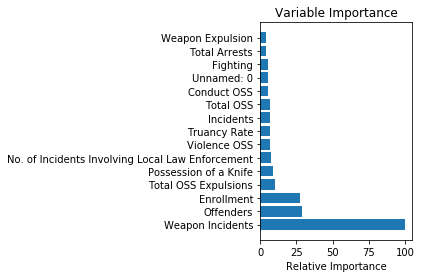

In [13]:
feature_importance = rfr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[0:15], feature_importance[sorted_idx[0:15]], align='center')
plt.yticks(pos[0:15], X_train.columns[sorted_idx[0:15]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

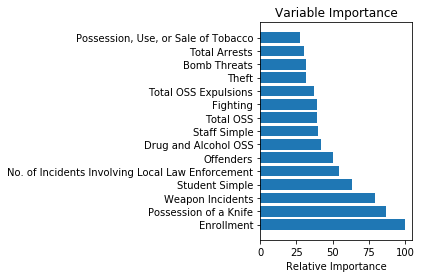

In [14]:
feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[0:15], feature_importance[sorted_idx[0:15]], align='center')
plt.yticks(pos[0:15], X_train.columns[sorted_idx[0:15]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [20]:
df.to_csv('/Users/joshuarkarnad/Desktop/Thinkful/Data/Important Data/WeaponDataV4.csv')